#**Autoencoder Model for Word Embedding**

#I. Import necessary things

In [61]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import re
import os
import pickle
import nltk
import numpy as np
from scipy.spatial import distance

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#II. Load corpus and preprocess it

In [62]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, nrows = 5000)

train_data = load_data("./Fixed_news_dataset.csv")

corpus = train_data["title"].to_list()
corpus = "\n".join(corpus)
print(corpus)

Tên cướp tiệm vàng Huế đại uý công an, công tác Trại giam
Bỏ mạng 5G, Nga tiến thẳng 4G 6G
Địa phương đứng đầu tổng 3 môn văn, toán, ngoại ngữ?
Người chết mưa lũ 'nghìn một' Mỹ 28
Hải Phòng: Hình ảnh xe "điên" tai nạn liên hoàn phố đi Tam Bạc
Đức thể suy thoái kinh tế
Những khoảnh khắc đẹp Gia Hân đăng quang Miss Teen International 2022
Lịch thi đấu vòng 11 V-League 2022: HAGL thở, Hà Nội FC
Soi kèo Liverpool vs Strasbourg. Nhận định, dự đoán bóng đá Giao hữu CLB (01h30, 1/8)
Bị thay hiệp 1, Ronaldo đùng đùng
Hà Nội: Người lao động than trời khu công nhân trầm trọng
Tin 1-8: Giá gas 18.000 đồng bình 12kg; Bắc Bộ mưa to - Tuổi Trẻ Online
Ukraine hàng mua ngũ cốc
Nam sinh Tây Ninh thắng biệt, ẵm vòng nguyệt quế Đường đỉnh Olympia
Bất động sản Bình Dương xuất hiện hội đầu tư mớiÂ
Tính năng giá iPhone 14 Pro
Chuông vàng vọng cổ 2022: Có chờ đợi?
Giá cà phê hôm 1/8: Robusta yếu tố hỗ trợ; Bài toán nâng năng lực chế biến cà phê Việt
Nhiều giải pháp hỗ trợ thu phí dừng - Tuổi Trẻ Online
Xác đ

In [63]:
def text_cleaner(text):
    # lower case text
    text = text.lower()
    text = re.sub("[^a-zàáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵ]", " ", text)
    return text

In [64]:
from nltk.tokenize import word_tokenize

with open("/content/vietnamese-stopwords.txt", 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file]

def preprocess_text(corpus):
  corpus_clean = text_cleaner(corpus)
  stop_words = lines
  word_tokens = word_tokenize(corpus_clean)
  return [w for w in word_tokens if not w in stop_words]
corpus_token =  preprocess_text(corpus)
print(corpus_token)

['cướp', 'tiệm', 'vàng', 'huế', 'đại', 'uý', 'công', 'an', 'công', 'tác', 'trại', 'giam', 'mạng', 'g', 'nga', 'tiến', 'thẳng', 'g', 'g', 'địa', 'phương', 'đứng', 'đầu', 'tổng', 'môn', 'văn', 'toán', 'ngoại', 'ngữ', 'chết', 'mưa', 'lũ', 'nghìn', 'mỹ', 'hải', 'phòng', 'hình', 'ảnh', 'xe', 'điên', 'tai', 'nạn', 'liên', 'hoàn', 'phố', 'đi', 'tam', 'bạc', 'đức', 'thể', 'suy', 'thoái', 'kinh', 'tế', 'khoảnh', 'khắc', 'đẹp', 'gia', 'hân', 'đăng', 'quang', 'miss', 'teen', 'international', 'lịch', 'thi', 'đấu', 'vòng', 'v', 'league', 'hagl', 'thở', 'hà', 'nội', 'fc', 'soi', 'kèo', 'liverpool', 'vs', 'strasbourg', 'định', 'dự', 'đoán', 'bóng', 'đá', 'giao', 'hữu', 'clb', 'h', 'thay', 'hiệp', 'ronaldo', 'đùng', 'đùng', 'hà', 'nội', 'lao', 'động', 'than', 'trời', 'khu', 'công', 'nhân', 'trầm', 'trọng', 'giá', 'gas', 'đồng', 'bình', 'kg', 'bắc', 'mưa', 'to', 'trẻ', 'online', 'ukraine', 'hàng', 'mua', 'ngũ', 'cốc', 'nam', 'sinh', 'tây', 'ninh', 'thắng', 'biệt', 'ẵm', 'vòng', 'nguyệt', 'quế', 'đường'

In [65]:
dictionary = sorted(list(set(corpus_token)))
print(dictionary)
if os.path.exists("mapping.pkl"):
  print("Load mapping")
  mapping = pickle.load(open("mapping.pkl", "rb"))
else:
  print("Save mapping")
  mapping = dict((c, i) for i, c in enumerate(dictionary))
  pickle.dump(mapping, open("mapping.pkl", "wb"))

print(dictionary)

['a', 'abe', 'accord', 'acv', 'additional', 'advisor', 'aerobic', 'aespa', 'afc', 'aff', 'affairs', 'after', 'against', 'agricultural', 'agut', 'aims', 'air', 'airlines', 'airports', 'airways', 'ajax', 'ak', 'akira', 'akita', 'album', 'alcaraz', 'alex', 'alibaba', 'alienoid', 'alliance', 'alzheimer', 'amazon', 'amelia', 'america', 'amg', 'amid', 'an', 'angela', 'angelababy', 'angelina', 'anna', 'anniversary', 'antifan', 'antlers', 'antony', 'ao', 'apg', 'apollo', 'apple', 'aprilia', 'aqua', 'arab', 'arabia', 'argentina', 'ariana', 'arsenal', 'arteta', 'as', 'asean', 'asks', 'asm', 'asp', 'aston', 'at', 'atgt', 'athletes', 'atletico', 'atm', 'atp', 'attrage', 'au', 'audi', 'aue', 'august', 'australia', 'auto', 'automobile', 'automotive', 'avai', 'avengers', 'awards', 'axie', 'axit', 'azov', 'b', 'baby', 'bad', 'bai', 'ballad', 'baltic', 'bamboo', 'ban', 'bang', 'bao', 'bar', 'barca', 'barcelona', 'bari', 'barie', 'bautista', 'bay', 'bayern', 'bb', 'be', 'beauty', 'begins', 'bella', 'ben

#III. Convert corpus to one-hot vectors & Define embedding dim

In [66]:
embedding_dim = 256
vocab_size = len(dictionary)
print(vocab_size)

3908


In [67]:
print(mapping)

{'a': 0, 'abe': 1, 'accord': 2, 'acv': 3, 'additional': 4, 'advisor': 5, 'aerobic': 6, 'aespa': 7, 'afc': 8, 'aff': 9, 'affairs': 10, 'after': 11, 'against': 12, 'agricultural': 13, 'agut': 14, 'aims': 15, 'air': 16, 'airlines': 17, 'airports': 18, 'airways': 19, 'ajax': 20, 'ak': 21, 'akira': 22, 'akita': 23, 'album': 24, 'alcaraz': 25, 'alex': 26, 'alibaba': 27, 'alienoid': 28, 'alliance': 29, 'alzheimer': 30, 'amazon': 31, 'amelia': 32, 'america': 33, 'amg': 34, 'amid': 35, 'an': 36, 'angela': 37, 'angelababy': 38, 'angelina': 39, 'anna': 40, 'anniversary': 41, 'antifan': 42, 'antlers': 43, 'antony': 44, 'ao': 45, 'apg': 46, 'apollo': 47, 'apple': 48, 'aprilia': 49, 'aqua': 50, 'arab': 51, 'arabia': 52, 'argentina': 53, 'ariana': 54, 'arsenal': 55, 'arteta': 56, 'as': 57, 'asean': 58, 'asks': 59, 'asm': 60, 'asp': 61, 'aston': 62, 'at': 63, 'atgt': 64, 'athletes': 65, 'atletico': 66, 'atm': 67, 'atp': 68, 'attrage': 69, 'au': 70, 'audi': 71, 'aue': 72, 'august': 73, 'australia': 74,

In [68]:
corpus_encode = [mapping[x] for x in corpus_token]
onehot_corpus = keras.utils.to_categorical(corpus_encode, num_classes=vocab_size)
print(onehot_corpus)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#IV. Define Autoencoder model

In [69]:
ae_model = keras.Sequential()
ae_model.add(keras.Input(shape=(vocab_size,)))
ae_model.add(keras.layers.Dense(embedding_dim, activation='relu'))
ae_model.add(keras.layers.Dense(vocab_size, activation='softmax'))

ae_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

if os.path.exists("ae_model.h5"):
  ae_model.load_weights("ae_model.h5")

ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1000704   
                                                                 
 dense_1 (Dense)             (None, 3908)              1004356   
                                                                 
Total params: 2005060 (7.65 MB)
Trainable params: 2005060 (7.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#V. Train AE model

In [71]:
# Train model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ae_model.h5", monitor='val_loss', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

ae_model.fit(x=onehot_corpus, y=onehot_corpus, batch_size=512, epochs=50,
          validation_split=0.2, validation_freq=1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb],
          workers=1, use_multiprocessing=False)

ae_model.save("ae_model.h5")

Epoch 1/100
78/78 [==============================] - 13s 166ms/step - loss: 3.7534 - accuracy: 0.6585 - val_loss: 3.0952 - val_accuracy: 0.7267
Epoch 2/100
78/78 [==============================] - 13s 170ms/step - loss: 2.2464 - accuracy: 0.7993 - val_loss: 2.1801 - val_accuracy: 0.8082
Epoch 3/100
78/78 [==============================] - 13s 170ms/step - loss: 1.5840 - accuracy: 0.8562 - val_loss: 1.7412 - val_accuracy: 0.8493
Epoch 4/100
78/78 [==============================] - 13s 169ms/step - loss: 1.2395 - accuracy: 0.8879 - val_loss: 1.4820 - val_accuracy: 0.8726
Epoch 5/100
78/78 [==============================] - 13s 171ms/step - loss: 1.0182 - accuracy: 0.9100 - val_loss: 1.3036 - val_accuracy: 0.8914
Epoch 6/100
78/78 [==============================] - 13s 167ms/step - loss: 0.8596 - accuracy: 0.9245 - val_loss: 1.1786 - val_accuracy: 0.9075
Epoch 7/100
78/78 [==============================] - 13s 172ms/step - loss: 0.7381 - accuracy: 0.9388 - val_loss: 1.0803 - val_accuracy:

#=======================================================================

# **How to use trained model**

#=======================================================================

#VI. Load trained model & Get output of 1st FC layer

In [72]:
reconstructed_model = keras.models.load_model("ae_model.h5")
we_model = keras.models.Model(inputs=reconstructed_model.inputs, outputs=reconstructed_model.get_layer('dense').output)

Define function to encode one-hot list of words

In [73]:
def encode_onehot(mapping, list_words):
  output = []

  for word in list_words:
    word_vector = [0 for _ in range(vocab_size)]

    if word in mapping.keys():
      word_index = mapping[word]
      word_vector[word_index] = 1

    output.append(word_vector)

  return output

#VII. Test model

In [74]:
input_sentence = "Việt Nam vô địch siêu cúp Anh sau khi đánh bại MC"

preprocess_sentence = preprocess_text(input_sentence)
onehot_sentence = encode_onehot(mapping, preprocess_sentence)

embedded_sentence = we_model.predict(onehot_sentence)
print(embedded_sentence)

1/1 [==============================] - 0s 103ms/step
[[0.77040446 0.08971033 0.         ... 0.64036834 0.71109986 0.6836535 ]
 [0.6714719  0.         0.14069825 ... 0.57568705 0.734254   0.6831434 ]
 [0.6657808  0.07325909 0.65864706 ... 0.08655232 0.6125983  0.67359376]
 ...
 [0.09409791 0.02689776 0.72160935 ... 0.6743578  0.04911718 0.05761251]
 [0.09600544 0.6454821  0.6829899  ... 0.08301762 0.6248965  0.08394611]
 [0.66892886 0.11883846 0.7082292  ... 0.64583004 0.6584703  0.67568386]]


In [75]:
word_0 = "trộm"
word_1 = "cướp"
word_2 = "mua "

preprocess_words = preprocess_text(' '.join([word_0, word_1, word_2]))
onehot_words = encode_onehot(mapping, preprocess_words)

word_0_eb, word_1_eb, word_2_eb = we_model.predict(onehot_words)

# print("OUTPUT EMBEDDING")
# print(word_0_eb)
# print(word_1_eb)
# print(word_2_eb)

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

1/1 [==============================] - 0s 46ms/step
OUTPUT DISTANCE
0 vs 1:  6.826142311096191
1 vs 2:  6.1061906814575195
2 vs 0:  6.626646518707275


1/1 [==============================] - 0s 44ms/step


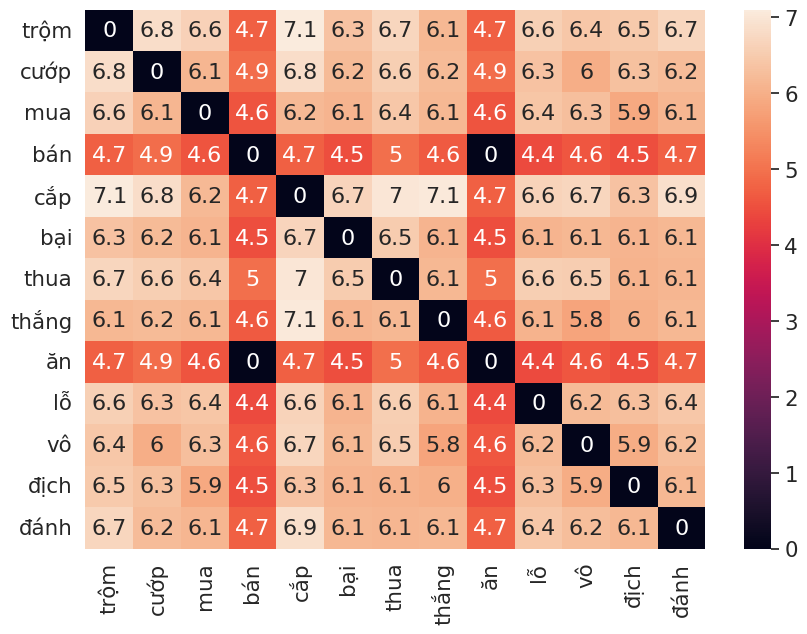

In [77]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["trộm", "cướp", "mua", "bán", "cắp", "bại", "thua", "thắng", "ăn", "lỗ", "vô", "địch", "đánh"]
onehot_words = encode_onehot(mapping, list_words)
list_word_embs = we_model.predict(onehot_words)

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()